
Salut à vous, ce notebook vient de TATSAMBON :) 
Pour faciliter la compréhension de la méthode d'apprentissage Supervisé qui nous concerne : K NN 
**Il est important de noter qu'un nouvel notebook sera créé pour l'implémentation dudit concept   dans le cadre de notre projet **






En fait, le k-NN est un type spécial d’algorithme de l'appentissage supervisé. Il est "non paramétrique" et il se base uniquement sur les données d’entraînement. Ce type d’algorithme est appelé memory-based.



[resources de kaggle](https://docs.google.com/document/d/16SNyXSDShEEzjN474f6V1XTezAZ8b4-aOmMV7LNgI_I/edit#)


In [ ]:
cd /content/sample_data/PROJET INF 365


/content/sample_data/PROJET INF 365


In [ ]:
ls 

DataT3RR.csv


In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns


ON UTILISE ICI UNE DATASET FORURNIE PAR 
[le site web KAGGLE ]

In [110]:
donnees = pd.read_csv('./DataT3RR.csv',sep=r'\s*,\s*')
print('information relatives a notre dataset :',donnees.shape)
donnees.info()
donnees

information relatives a notre dataset : (923, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stations              923 non-null    object 
 1   Dates                 923 non-null    object 
 2   Temperatue_Matinee    923 non-null    float64
 3   Temperature_apreM     923 non-null    float64
 4   Temperatures_Moy      923 non-null    float64
 5   Precipitation         923 non-null    float64
 6   Est_un_jour_de_pluie  923 non-null    int64  
 7   Demain_il_pleura      923 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 57.8+ KB


<ipython-input-110-1e27d093b9b7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  donnees = pd.read_csv('./DataT3RR.csv',sep=r'\s*,\s*')


,Stations,Dates,Temperatue_Matinee,Temperature_apreM,Temperatures_Moy,Precipitation,Est_un_jour_de_pluie,Demain_il_pleura
0,Stasiun Meteorologi Nangapinoh,20-03-2010,20.3,31.1,25.8,108.0,1,1
1,Stasiun Meteorologi Maritim Tanjung Mas,07-03-2010,25.0,31.8,29.2,106.0,1,1
2,Stasiun Klimatologi Mempawah,09-01-2009,23.4,29.6,25.8,100.6,1,1
3,Stasiun Meteorologi Cilacap,09-01-2009,23.6,28.0,25.6,93.9,1,1
4,Stasiun Klimatologi Bogor,21-01-2009,21.1,29.4,25.5,93.0,1,1
...,...,...,...,...,...,...,...,...
918,Stasiun Klimatologi Bogor,09-03-2009,22.4,32.5,25.9,0.0,0,0
919,Stasiun Klimatologi Bogor,18-03-2009,21.2,33.0,26.6,0.0,0,0
920,Stasiun Klimatologi Bogor,19-03-2009,21.3,31.8,25.2,0.0,0,0
921,Stasiun Klimatologi Bogor,21-03-2009,21.6,32.4,26.1,0.0,0,0


In [111]:
donnees = donnees.drop(columns=['Stations','Dates'],

                 axis=1)
donnees = donnees.dropna(how='any')
print(donnees.shape)

(923, 6)


In [112]:
print(donnees.shape)
donnees.head() 

(923, 6)


,Temperatue_Matinee,Temperature_apreM,Temperatures_Moy,Precipitation,Est_un_jour_de_pluie,Demain_il_pleura
0,20.3,31.1,25.8,108.0,1,1
1,25.0,31.8,29.2,106.0,1,1
2,23.4,29.6,25.8,100.6,1,1
3,23.6,28.0,25.6,93.9,1,1
4,21.1,29.4,25.5,93.0,1,1


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


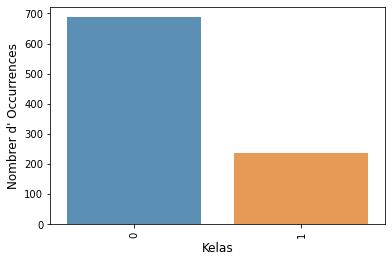

In [113]:
cnt_pro = donnees['Est_un_jour_de_pluie'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Nombrer d\' Occurrences', fontsize=12)
plt.xlabel('Kelas', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [114]:
# Calcule de la matrice de corolation
corr = donnees.corr()
corr1 = pd.DataFrame(abs(corr['Demain_il_pleura']),columns = ['Demain_il_pleura','Temperatue_Matinee','Temperature_apreM','Temperatures_Moy'])
nonvals = corr1.loc[corr1['Demain_il_pleura'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

# extraction des donnes de corellation <0.%
donnees1 = donnees.drop(columns=nonvals,axis=1)
print('Donnes finales ',donnees1.shape)

Var correlation < 0.5% Empty DataFrame
Columns: [Demain_il_pleura, Temperatue_Matinee, Temperature_apreM, Temperatures_Moy]
Index: []
Donnes finales  (923, 6)


<AxesSubplot:>

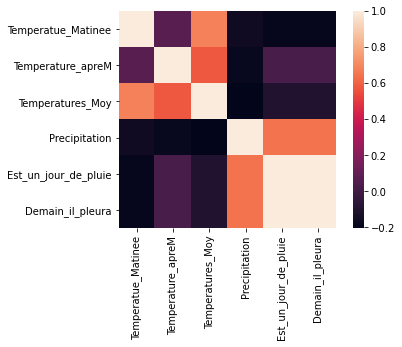

In [117]:
donnees = donnees[['Temperatue_Matinee','Temperature_apreM','Temperatures_Moy','Precipitation','Est_un_jour_de_pluie','Demain_il_pleura']] 
#Subsetting the data Stations	Dates						
cor = donnees.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [119]:
from sklearn.model_selection import train_test_split
Y = donnees['Demain_il_pleura']
X = donnees.drop(columns=['Demain_il_pleura'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [120]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (646, 5)
Y train shape:  (646,)
X test shape:  (277, 5)
Y test shape:  (277,)


In [159]:
from sklearn.neighbors import KNeighborsClassifier

# definition de notre model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# entrainement de mode
knncla.fit(X_train, Y_train)

# nous effectuons une prediction sur les donnees que nous avons choisi comme notre testSet
Y_predict6 = knncla.predict(X_test)


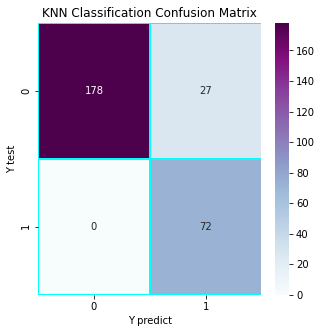

In [141]:
# la matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [123]:
test_acc_knncla = round(knncla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_knncla = round(knncla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [130]:


#Accuracy
model1 = pd.DataFrame({
    'Model': ['KNN'],
    'Train Score': [train_acc_knncla],
    'Test Score': [test_acc_knncla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,KNN,97.68,94.95


In [125]:
#Precision, Recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict6)

print('moyene de  precision-recall score: {0:0.2f}'.format(
      average_precision))

moyene de  precision-recall score: 0.84


Text(0.5, 1.0, '2-class Precision-Recall courbe: AP=0.84')

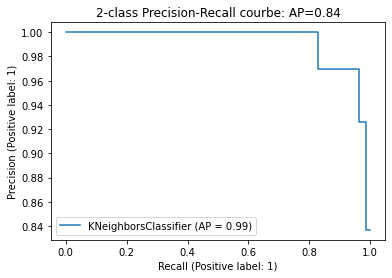

In [126]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(knncla,X_train, Y_train)
disp.ax_.set_title('2-class Precision-Recall courbe: '
                   'AP={0:0.2f}'.format(average_precision))

In [129]:
Y1 = donnees['Demain_il_pleura']
X1 = donnees.drop(columns=['Demain_il_pleura','Est_un_jour_de_pluie'])

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.05, penalty="l1", dual=False,random_state=9).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Temperatue_Matinee', 'Temperature_apreM', 'Precipitation']
3


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


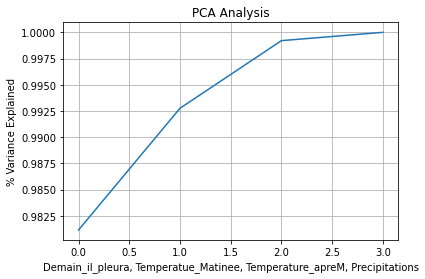

In [131]:
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#		Temperatures_Moy		Est_un_jour_de_pluie	
plt.xlabel('Demain_il_pleura, Temperatue_Matinee, Temperature_apreM, Precipitations')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [132]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1, 5))) 
print(variance[30:70])


Series([], dtype: float64)


In [137]:
X1 = donnees[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=9)

In [181]:

pedictio_afaire= pd.read_csv('./nouveau_a_predire.csv',sep=r'\s*,\s*')
pedictio_afaire = pedictio_afaire.drop(columns=['Stations','Dates','Demain_il_pleura'],

                 axis=1)
pedictio_afaire = pedictio_afaire.dropna(how='any')

knncla.predict(pedictio_afaire)[0]
    

<ipython-input-181-fa3c898f11da>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pedictio_afaire= pd.read_csv('./nouveau_a_predire.csv',sep=r'\s*,\s*')


0